In [1]:
#from pyspark.sql import SparkSession

In [2]:
#spark=SparkSession.builder.master("local[*]").appName("news scraper").getOrCreate()

In [3]:
#df=spark.read.format("parquet").load("hdfs://10.128.0.24:8020/nonpartnewsdata/*.parquet")

In [3]:
!pip install nltk

     |████████████████████████████████| 1.5 MB 7.9 MB/s            
     |████████████████████████████████| 749 kB 67.5 MB/s            


In [4]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
import pickle
import re
# from pyspark.sql.types import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from numpy.random import rand
#from wordcloud import WordCloud

%matplotlib inline

#1
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
#from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/jupyter/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [11]:
df=pd.read_parquet(r"newsdata/news-output-vertexai_part-00000-0beb61c3-292c-4f40-a40f-ac309274cedd-c000.snappy.parquet")
df1=pd.read_parquet(r"newsdata/news-output-vertexai_part-00001-0beb61c3-292c-4f40-a40f-ac309274cedd-c000.snappy.parquet")
df2=pd.read_parquet(r"newsdata/news-output-vertexai_part-00003-0beb61c3-292c-4f40-a40f-ac309274cedd-c000.snappy.parquet")
df3=pd.read_parquet(r"newsdata/news-output-vertexai_part-00004-0beb61c3-292c-4f40-a40f-ac309274cedd-c000.snappy.parquet")
df4=pd.read_parquet(r"newsdata/news-output-vertexai_part-00006-0beb61c3-292c-4f40-a40f-ac309274cedd-c000.snappy.parquet")

In [12]:
dfinal=pd.concat([df,df1,df2,df3,df4])

In [13]:
dff = dfinal.copy(deep=True)

In [14]:
len(dff)

14259

In [15]:
dff.head(4)

,Title,Link,Published,News,Category,Date,__index_level_0__
0,China's Alibaba sets $100 billion target for S...,https://economictimes.indiatimes.com/news/inte...,"Last Updated: Dec 17, 2021, 12:42 PM IST",Chinese e-commerce giant Alibaba has set a tar...,business,2021-12-28,0
1,Tesla hit by string of US sex harassment lawsuits,https://economictimes.indiatimes.com/news/inte...,"Last Updated: Dec 15, 2021, 08:02 AM IST","Six women sued Tesla on Tuesday, alleging a cu...",business,2021-12-28,1
2,Pakistan acquires USD 15.3 billion loans in FY...,https://economictimes.indiatimes.com/news/inte...,"Last Updated: Dec 14, 2021, 04:23 PM IST",Cash-strapped Pakistan contracted USD 15.32 bi...,business,2021-12-28,2
3,JP Morgan fined $200 mn after employees found ...,https://economictimes.indiatimes.com/news/inte...,"Last Updated: Dec 18, 2021, 11:28 AM IST",U.S. regulators fined J.P. Morgan Securities $...,business,2021-12-28,3


In [16]:
dff.head()

,Title,Link,Published,News,Category,Date,__index_level_0__
0,China's Alibaba sets $100 billion target for S...,https://economictimes.indiatimes.com/news/inte...,"Last Updated: Dec 17, 2021, 12:42 PM IST",Chinese e-commerce giant Alibaba has set a tar...,business,2021-12-28,0
1,Tesla hit by string of US sex harassment lawsuits,https://economictimes.indiatimes.com/news/inte...,"Last Updated: Dec 15, 2021, 08:02 AM IST","Six women sued Tesla on Tuesday, alleging a cu...",business,2021-12-28,1
2,Pakistan acquires USD 15.3 billion loans in FY...,https://economictimes.indiatimes.com/news/inte...,"Last Updated: Dec 14, 2021, 04:23 PM IST",Cash-strapped Pakistan contracted USD 15.32 bi...,business,2021-12-28,2
3,JP Morgan fined $200 mn after employees found ...,https://economictimes.indiatimes.com/news/inte...,"Last Updated: Dec 18, 2021, 11:28 AM IST",U.S. regulators fined J.P. Morgan Securities $...,business,2021-12-28,3
4,CEO of battery startup awarded 'staggering' El...,https://economictimes.indiatimes.com/news/inte...,"Last Updated: Dec 17, 2021, 08:06 AM IST","Shareholders of QuantumScape Corp, the solid-s...",business,2021-12-28,4


In [17]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14259 entries, 0 to 29
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Title              14259 non-null  object
 1   Link               14259 non-null  object
 2   Published          14259 non-null  object
 3   News               14259 non-null  object
 4   Category           14259 non-null  object
 5   Date               14259 non-null  object
 6   __index_level_0__  14259 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 891.2+ KB


In [18]:
dff.describe()

,__index_level_0__
count,14259.000000
mean,939.009608
std,589.772497
min,0.000000
25%,420.000000
50%,929.000000
75%,1438.500000
max,2015.000000


In [19]:
len(dff)

14259

In [20]:
dff.groupby('Category').Category.count()

Category
arts                        54
business                  2016
entertainment             2015
information-technology     100
international-news        2014
local-stories             2086
marketing                  169
politics                  1684
science                   1999
social-issues               30
sports                    2092
Name: Category, dtype: int64

In [21]:
target_category = dff['Category'].unique()
print(target_category)

['business' 'entertainment' 'international-news' 'science' 'sports'
 'local-stories' 'politics' 'marketing' 'information-technology' 'arts'
 'social-issues']


In [22]:
dff['CategoryId'] = dff['Category'].factorize()[0]
dff.head()

,Title,Link,Published,News,Category,Date,__index_level_0__,CategoryId
0,China's Alibaba sets $100 billion target for S...,https://economictimes.indiatimes.com/news/inte...,"Last Updated: Dec 17, 2021, 12:42 PM IST",Chinese e-commerce giant Alibaba has set a tar...,business,2021-12-28,0,0
1,Tesla hit by string of US sex harassment lawsuits,https://economictimes.indiatimes.com/news/inte...,"Last Updated: Dec 15, 2021, 08:02 AM IST","Six women sued Tesla on Tuesday, alleging a cu...",business,2021-12-28,1,0
2,Pakistan acquires USD 15.3 billion loans in FY...,https://economictimes.indiatimes.com/news/inte...,"Last Updated: Dec 14, 2021, 04:23 PM IST",Cash-strapped Pakistan contracted USD 15.32 bi...,business,2021-12-28,2,0
3,JP Morgan fined $200 mn after employees found ...,https://economictimes.indiatimes.com/news/inte...,"Last Updated: Dec 18, 2021, 11:28 AM IST",U.S. regulators fined J.P. Morgan Securities $...,business,2021-12-28,3,0
4,CEO of battery startup awarded 'staggering' El...,https://economictimes.indiatimes.com/news/inte...,"Last Updated: Dec 17, 2021, 08:06 AM IST","Shareholders of QuantumScape Corp, the solid-s...",business,2021-12-28,4,0


In [83]:
mappingdata=dict(dff[['Category','CategoryId']].value_counts())

In [88]:
final_dict=dict(mappingdata.keys())

In [89]:
final_dict

{'sports': 4,
 'local-stories': 5,
 'business': 0,
 'entertainment': 1,
 'international-news': 2,
 'science': 3,
 'politics': 6,
 'marketing': 7,
 'information-technology': 8,
 'arts': 9,
 'social-issues': 10}

In [23]:
c_id_count = pd.DataFrame(dff.groupby('CategoryId').Category.agg(['count']).rename(columns={'Category':'Count'}))
c_id_count

,count
CategoryId,
0,2016
1,2015
2,2014
3,1999
4,2092
5,2086
6,1684
7,169
8,100


In [26]:
cat_id_count = pd.merge(category, c_id_count, on='CategoryId')
cat_id_count


NameError: name 'category' is not defined

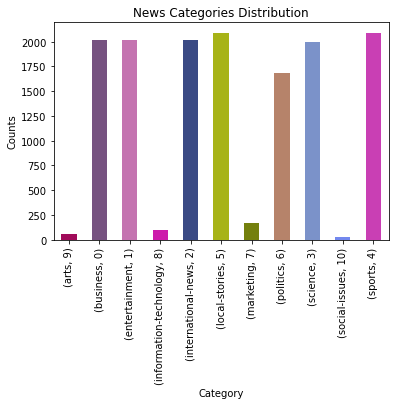

In [27]:
dff.groupby('Category').CategoryId.value_counts().plot(kind = "bar", color =np.random.rand(11,3))
plt.title("News Categories Distribution")
plt.xlabel('Category')
plt.ylabel('Counts')
plt.show()

In [29]:
dff_500 = dff[~dff.Category.isin(dff['Category'].value_counts()[dff['Category'].value_counts()<500].index)]

In [30]:
dff_500

,Title,Link,Published,News,Category,Date,__index_level_0__,CategoryId
0,China's Alibaba sets $100 billion target for S...,https://economictimes.indiatimes.com/news/inte...,"Last Updated: Dec 17, 2021, 12:42 PM IST",Chinese e-commerce giant Alibaba has set a tar...,business,2021-12-28,0,0
1,Tesla hit by string of US sex harassment lawsuits,https://economictimes.indiatimes.com/news/inte...,"Last Updated: Dec 15, 2021, 08:02 AM IST","Six women sued Tesla on Tuesday, alleging a cu...",business,2021-12-28,1,0
2,Pakistan acquires USD 15.3 billion loans in FY...,https://economictimes.indiatimes.com/news/inte...,"Last Updated: Dec 14, 2021, 04:23 PM IST",Cash-strapped Pakistan contracted USD 15.32 bi...,business,2021-12-28,2,0
3,JP Morgan fined $200 mn after employees found ...,https://economictimes.indiatimes.com/news/inte...,"Last Updated: Dec 18, 2021, 11:28 AM IST",U.S. regulators fined J.P. Morgan Securities $...,business,2021-12-28,3,0
4,CEO of battery startup awarded 'staggering' El...,https://economictimes.indiatimes.com/news/inte...,"Last Updated: Dec 17, 2021, 08:06 AM IST","Shareholders of QuantumScape Corp, the solid-s...",business,2021-12-28,4,0
...,...,...,...,...,...,...,...,...
532,Solskjaer pays price for failing to rekindle M...,https://economictimes.indiatimes.com/news/spor...,"Last Updated: Nov 21, 2021, 04:36 PM IST",As Ole Gunnar Solskjaer trudged forlornly towa...,sports,2021-12-27,93,4
533,2019 US Open champ Bianca Andreescu to skip Au...,https://economictimes.indiatimes.com/news/spor...,"Last Updated: Dec 08, 2021, 07:06 AM IST",Canada tennis star Bianca Andreescu has announ...,sports,2021-12-27,94,4
534,SportZchain partners with Tamil Thalaivas as o...,https://economictimes.indiatimes.com/markets/c...,"Last Updated: Dec 09, 2021, 01:24 PM IST","NEW DELHI: Tamil Thalaivas, the Tamil Nadu bas...",sports,2021-12-27,95,4
535,"Right way to go, says former coach Shastri in ...",https://economictimes.indiatimes.com/news/spor...,"Last Updated: Dec 27, 2021, 01:38 PM IST",Former India coach Ravi Shastri has supported ...,sports,2021-12-27,96,4


In [31]:
cat_id_count[cat_id_count["CategoryId"]==dff_500["CategoryId"]]

NameError: name 'cat_id_count' is not defined

In [32]:
dff_500['Category'].value_counts()

sports                2092
local-stories         2086
business              2016
entertainment         2015
international-news    2014
science               1999
politics              1684
Name: Category, dtype: int64

# Remove Non-Alphanumeric Characters

In [33]:
dff.head(3)

,Title,Link,Published,News,Category,Date,__index_level_0__,CategoryId
0,China's Alibaba sets $100 billion target for S...,https://economictimes.indiatimes.com/news/inte...,"Last Updated: Dec 17, 2021, 12:42 PM IST",Chinese e-commerce giant Alibaba has set a tar...,business,2021-12-28,0,0
1,Tesla hit by string of US sex harassment lawsuits,https://economictimes.indiatimes.com/news/inte...,"Last Updated: Dec 15, 2021, 08:02 AM IST","Six women sued Tesla on Tuesday, alleging a cu...",business,2021-12-28,1,0
2,Pakistan acquires USD 15.3 billion loans in FY...,https://economictimes.indiatimes.com/news/inte...,"Last Updated: Dec 14, 2021, 04:23 PM IST",Cash-strapped Pakistan contracted USD 15.32 bi...,business,2021-12-28,2,0


In [74]:
dfk=pd.DataFrame(dff,columns=['Category','CategoryId'])

In [ ]:
dfk.

In [34]:
df_news = dff.copy()

In [35]:
for row in range(len(df_news)):
    line = df_news.iloc[row,0]
    df_news.iloc[row,0] = re.sub("[^a-zA-Z0-9]", " ", line)

In [36]:
df_news.head(3)

,Title,Link,Published,News,Category,Date,__index_level_0__,CategoryId
0,China s Alibaba sets 100 billion target for S...,https://economictimes.indiatimes.com/news/inte...,"Last Updated: Dec 17, 2021, 12:42 PM IST",Chinese e-commerce giant Alibaba has set a tar...,business,2021-12-28,0,0
1,Tesla hit by string of US sex harassment lawsuits,https://economictimes.indiatimes.com/news/inte...,"Last Updated: Dec 15, 2021, 08:02 AM IST","Six women sued Tesla on Tuesday, alleging a cu...",business,2021-12-28,1,0
2,Pakistan acquires USD 15 3 billion loans in FY...,https://economictimes.indiatimes.com/news/inte...,"Last Updated: Dec 14, 2021, 04:23 PM IST",Cash-strapped Pakistan contracted USD 15.32 bi...,business,2021-12-28,2,0


In [37]:
def remove_tags(text):
  remove = re.compile(r'')
  return re.sub(remove, '', text)
df_news['Category'] = df_news['Category'].apply(remove_tags)

In [38]:
dff.head(3)

,Title,Link,Published,News,Category,Date,__index_level_0__,CategoryId
0,China's Alibaba sets $100 billion target for S...,https://economictimes.indiatimes.com/news/inte...,"Last Updated: Dec 17, 2021, 12:42 PM IST",Chinese e-commerce giant Alibaba has set a tar...,business,2021-12-28,0,0
1,Tesla hit by string of US sex harassment lawsuits,https://economictimes.indiatimes.com/news/inte...,"Last Updated: Dec 15, 2021, 08:02 AM IST","Six women sued Tesla on Tuesday, alleging a cu...",business,2021-12-28,1,0
2,Pakistan acquires USD 15.3 billion loans in FY...,https://economictimes.indiatimes.com/news/inte...,"Last Updated: Dec 14, 2021, 04:23 PM IST",Cash-strapped Pakistan contracted USD 15.32 bi...,business,2021-12-28,2,0


In [39]:
def special_char(text):
  reviews = ''
  for x in text:
    if x.isalnum():
      reviews = reviews + x
    else:
      reviews = reviews + ' '
  return reviews
df_news['Category'] = df_news['Category'].apply(special_char)

In [40]:
df_news

,Title,Link,Published,News,Category,Date,__index_level_0__,CategoryId
0,China s Alibaba sets 100 billion target for S...,https://economictimes.indiatimes.com/news/inte...,"Last Updated: Dec 17, 2021, 12:42 PM IST",Chinese e-commerce giant Alibaba has set a tar...,business,2021-12-28,0,0
1,Tesla hit by string of US sex harassment lawsuits,https://economictimes.indiatimes.com/news/inte...,"Last Updated: Dec 15, 2021, 08:02 AM IST","Six women sued Tesla on Tuesday, alleging a cu...",business,2021-12-28,1,0
2,Pakistan acquires USD 15 3 billion loans in FY...,https://economictimes.indiatimes.com/news/inte...,"Last Updated: Dec 14, 2021, 04:23 PM IST",Cash-strapped Pakistan contracted USD 15.32 bi...,business,2021-12-28,2,0
3,JP Morgan fined 200 mn after employees found ...,https://economictimes.indiatimes.com/news/inte...,"Last Updated: Dec 18, 2021, 11:28 AM IST",U.S. regulators fined J.P. Morgan Securities $...,business,2021-12-28,3,0
4,CEO of battery startup awarded staggering El...,https://economictimes.indiatimes.com/news/inte...,"Last Updated: Dec 17, 2021, 08:06 AM IST","Shareholders of QuantumScape Corp, the solid-s...",business,2021-12-28,4,0
...,...,...,...,...,...,...,...,...
25,Zomato and Fabindia face flak on social media,https://economictimes.indiatimes.com/tech/tech...,"Last Updated: Oct 20, 2021, 06:00 AM IST",Food delivery app Zomato and ethnic apparel br...,social issues,2021-12-27,25,10
26,Optimism on philanthropy helps solve issues of...,https://economictimes.indiatimes.com/magazines...,"Last Updated: Dec 24, 2021, 11:09 AM IST",GiveIndia poll shows 85% of respondents are bu...,social issues,2021-12-27,26,10
27,Aadhaar UAN linking deadline extended till Nov...,https://economictimes.indiatimes.com/wealth/in...,"Last Updated: Nov 22, 2021, 01:45 PM IST",The Employees Provident Fund Organisation (EPF...,social issues,2021-12-27,27,10
28,Transparency on algorithms needs to be conscio...,https://economictimes.indiatimes.com/news/indi...,"Last Updated: Nov 21, 2021, 01:10 PM IST",Taking transparent and consistent approach to ...,social issues,2021-12-27,28,10


In [41]:
stop = set(stopwords.words('english'))

sports     4           2092
local-stories  5        2086
business   0           2016
entertainment  1        2015
international-news  2  2014

sports
local-stories
business
entertainmen
international-news

business = df_news[df_news['CategoryId'] == 0]
business = business['Catrgory']

international-news = dataset[dataset['CategoryId'] ==2]
international-news = international-news['Text']

#politics = dataset[dataset['CategoryId'] == 2]
#politics = politics['Text']

sport = df_news[dataset['CategoryId'] == 4]
sport = sport['Text']

entertainment = df_news[df_news['CategoryId'] == 1]
entertainment = entertainment['Text']


def wordcloud_draw(dataset, color = 'white'):
  words = ' '.join(dataset)
  cleaned_word = ' '.join([word for word in words.split()
                           if (word != 'news' and word != 'text')])
  wordcloud = WordCloud(stopwords = stop,
                        background_color = color,
                        width = 2500, height = 2500).generate(cleaned_word)

  plt.figure(1, figsize = (10,7))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()

print("business related words:")
wordcloud_draw(business, 'white')

print("tech related words:")
wordcloud_draw(tech, 'white')

print("politics related words:")
wordcloud_draw(politics, 'white')

print("sport related words:")
wordcloud_draw(sport, 'white')

print("entertainment related words:")
wordcloud_draw(entertainment, 'white')

SyntaxError: invalid syntax (766075205.py, line 3)

In [42]:
text = df_news["Title"]
text.head(100)

0     China s Alibaba sets  100 billion target for S...
1     Tesla hit by string of US sex harassment lawsuits
2     Pakistan acquires USD 15 3 billion loans in FY...
3     JP Morgan fined  200 mn after employees found ...
4     CEO of battery startup awarded  staggering  El...
                            ...                        
95    China suspends energy projects in Sri Lankan i...
96    EU adds more pieces to its  elusive  capital m...
97    Economists wargame how Omicron will impact glo...
98    COVID 19 threatens to knock away Germany s las...
99    Afghan economy nears collapse as pressure buil...
Name: Title, Length: 100, dtype: object

In [39]:
category = df_news['Category']
category.unique()

array(['social issues', 'marketing', 'local stories', 'politics',
       'information technology', 'sports', 'arts', 'science', 'business',
       'entertainment', 'international news'], dtype=object)

# Remove all Tags

In [43]:
def remove_tags(text):
  remove = re.compile(r'<.*?>')
  return re.sub(remove, '', text)

df_news['Title'] = df_news['Title'].apply(remove_tags)
df_news['Title'][1]

1    Tesla hit by string of US sex harassment lawsuits
1    NASA s class of 10 astronauts include cyclists...
1    Thriving during the lockdown  Game plan of sma...
1    Indian Youth wants more participation for itse...
Name: Title, dtype: object

# remove special characters


In [44]:
def special_char(text):
  reviews = ''
  for x in text:
    if x.isalnum():
      reviews = reviews + x
    else:
      reviews = reviews + ' '
  return reviews
df_news['Title'] = df_news['Title'].apply(special_char)
df_news['Title'][1]

1    Tesla hit by string of US sex harassment lawsuits
1    NASA s class of 10 astronauts include cyclists...
1    Thriving during the lockdown  Game plan of sma...
1    Indian Youth wants more participation for itse...
Name: Title, dtype: object

# convert everything in lower case

In [45]:
def convert_lower(text):
   return text.lower()

df_news['Title'] = df_news['Title'].apply(convert_lower)
df_news['Title'][1]

1    tesla hit by string of us sex harassment lawsuits
1    nasa s class of 10 astronauts include cyclists...
1    thriving during the lockdown  game plan of sma...
1    indian youth wants more participation for itse...
Name: Title, dtype: object

# remove all stopwords

In [46]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /home/jupyter/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [47]:
def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))
  words = word_tokenize(text)
  return [x for x in words if x not in stop_words]

df_news['Title'] = df_news['Title'].apply(remove_stopwords)
df_news['Title'][1]

1    [tesla, hit, string, us, sex, harassment, laws...
1    [nasa, class, 10, astronauts, include, cyclist...
1    [thriving, lockdown, game, plan, small, indian...
1    [indian, youth, wants, participation, action, ...
Name: Title, dtype: object

# lemmatizing or stemming the words

In [48]:
def lemmatize_word(text):
  wordnet = WordNetLemmatizer()
  return " ".join([wordnet.lemmatize(word) for word in text])

df_news['Title'] = df_news['Title'].apply(lemmatize_word)
df_news['Title'][1]

1            tesla hit string u sex harassment lawsuit
1    nasa class 10 astronaut include cyclist physic...
1       thriving lockdown game plan small indian brand
1    indian youth want participation action climate...
Name: Title, dtype: object

# after text_preprocessing print datase

In [49]:
df_news

,Title,Link,Published,News,Category,Date,__index_level_0__,CategoryId
0,china alibaba set 100 billion target southeast...,https://economictimes.indiatimes.com/news/inte...,"Last Updated: Dec 17, 2021, 12:42 PM IST",Chinese e-commerce giant Alibaba has set a tar...,business,2021-12-28,0,0
1,tesla hit string u sex harassment lawsuit,https://economictimes.indiatimes.com/news/inte...,"Last Updated: Dec 15, 2021, 08:02 AM IST","Six women sued Tesla on Tuesday, alleging a cu...",business,2021-12-28,1,0
2,pakistan acquires usd 15 3 billion loan fy21 r...,https://economictimes.indiatimes.com/news/inte...,"Last Updated: Dec 14, 2021, 04:23 PM IST",Cash-strapped Pakistan contracted USD 15.32 bi...,business,2021-12-28,2,0
3,jp morgan fined 200 mn employee found using pe...,https://economictimes.indiatimes.com/news/inte...,"Last Updated: Dec 18, 2021, 11:28 AM IST",U.S. regulators fined J.P. Morgan Securities $...,business,2021-12-28,3,0
4,ceo battery startup awarded staggering elon mu...,https://economictimes.indiatimes.com/news/inte...,"Last Updated: Dec 17, 2021, 08:06 AM IST","Shareholders of QuantumScape Corp, the solid-s...",business,2021-12-28,4,0
...,...,...,...,...,...,...,...,...
25,zomato fabindia face flak social medium,https://economictimes.indiatimes.com/tech/tech...,"Last Updated: Oct 20, 2021, 06:00 AM IST",Food delivery app Zomato and ethnic apparel br...,social issues,2021-12-27,25,10
26,optimism philanthropy help solve issue health ...,https://economictimes.indiatimes.com/magazines...,"Last Updated: Dec 24, 2021, 11:09 AM IST",GiveIndia poll shows 85% of respondents are bu...,social issues,2021-12-27,26,10
27,aadhaar uan linking deadline extended till nov...,https://economictimes.indiatimes.com/wealth/in...,"Last Updated: Nov 22, 2021, 01:45 PM IST",The Employees Provident Fund Organisation (EPF...,social issues,2021-12-27,27,10
28,transparency algorithm need conscious step soc...,https://economictimes.indiatimes.com/news/indi...,"Last Updated: Nov 21, 2021, 01:10 PM IST",Taking transparent and consistent approach to ...,social issues,2021-12-27,28,10


In [69]:
df_news['Category'].value_counts()

sports                    2092
local stories             2086
business                  2016
entertainment             2015
international news        2014
science                   1999
politics                  1684
marketing                  169
information technology     100
arts                        54
social issues               30
Name: Category, dtype: int64

In [70]:
df_news['CategoryId'].value_counts()

4     2092
5     2086
0     2016
1     2015
2     2014
3     1999
6     1684
7      169
8      100
9       54
10      30
Name: CategoryId, dtype: int64

# declared dependent and independent value


In [50]:
x = df_news['Title']
y = df_news['Category']

# create and fit bag of words model


In [71]:
from sklearn.feature_extraction.text import CountVectorizer

x = np.array(df_news.iloc[:,0].values)
y = np.array(df_news.CategoryId.values)

cv = CountVectorizer(max_features = 5000)
x = cv.fit_transform(df_news.Title).toarray()

print("X.shape = ",x.shape)
print("y.shape = ",y.shape)


X.shape =  (14259, 5000)
y.shape =  (14259,)


In [52]:
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [72]:
print(y)

[ 0  0  0 ... 10 10 10]


# train test and split the dataset into training and test set


In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)


print(len(x_train))
print(len(x_test))

9981
4278


In [54]:
print(x_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Data Preprocessing


In [55]:
# create empty list
#create list of model and accuracy dicts
perform_list = []

# create, fit and predict all Machine learning model


In [56]:
def run_model(model_name, est_c, est_pnlty):
    mdl=''
    if model_name == 'Logistic Regression':
        mdl = LogisticRegression()
    elif model_name == 'Random Forest':
        mdl = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0)
    elif model_name == 'Multinomial Naive Bayes':
        mdl = MultinomialNB(alpha=1.0,fit_prior=True)
    elif model_name == 'Support Vector Classifer':
        mdl = SVC()
    elif model_name == 'Decision Tree Classifier':
        mdl = DecisionTreeClassifier()
    elif model_name == 'K Nearest Neighbour':
        mdl = KNeighborsClassifier(n_neighbors=10 , metric= 'minkowski' , p = 4)
    elif model_name == 'Gaussian Naive Bayes':
        mdl = GaussianNB()
   


    oneVsRest = OneVsRestClassifier(mdl)
    oneVsRest.fit(x_train, y_train)
    y_pred = oneVsRest.predict(x_test)
    
    
    # Performance metrics
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    # Get precision, recall, f1 scores
    precision, recall, f1score, support = score(y_test, y_pred, average='micro')

    print(f'Test Accuracy Score of Basic {model_name}: % {accuracy}')
    print(f'Precision : {precision}')
    print(f'Recall    : {recall}')
    print(f'F1-score   : {f1score}')

    # Add performance parameters to list
    perform_list.append(dict([
        ('Model', model_name),
        ('Test Accuracy', round(accuracy, 2)),
        ('Precision', round(precision, 2)),
        ('Recall', round(recall, 2)),
        ('F1', round(f1score, 2))
         ]))

# Logistic Regression


In [57]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [58]:
run_model('Logistic Regression', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Logistic Regression: % 80.95
Precision : 0.8094904160822814
Recall    : 0.8094904160822814
F1-score   : 0.8094904160822816


# Random Forest

In [59]:
run_model('Random Forest', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Random Forest: % 80.2
Precision : 0.8020102851799906
Recall    : 0.8020102851799906
F1-score   : 0.8020102851799906


In [64]:
model = MultinomialNB()
model.fit(x_train, y_train)
file=open("newsmodel.pkl",'wb')
pickle.dump(model,file)

# Multinomial Naive Bayes

In [60]:
run_model('Multinomial Naive Bayes', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Multinomial Naive Bayes: % 81.98
Precision : 0.8197755960729313
Recall    : 0.8197755960729313
F1-score   : 0.8197755960729313


# Support vector machine

In [61]:
run_model('Support Vector Classifer', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Support Vector Classifer: % 81.18
Precision : 0.8118279569892473
Recall    : 0.8118279569892473
F1-score   : 0.8118279569892473


# Decision Tree

In [ ]:
run_model('Decision Tree Classifier', est_c=None, est_pnlty=None)

# KNN

In [ ]:
run_model('K Nearest Neighbour', est_c=None, est_pnlty=None)

# Gaussian Naive Bayes

In [ ]:
run_model('Gaussian Naive Bayes', est_c=None, est_pnlty=None)

# create dataframe of model, accuracy, precision,recall and f1


In [ ]:
model_performance = pd.DataFrame(data=perform_list)
model_performance = model_performance[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
model_performance

# best model to perform accuracy score

In [ ]:
model = model_performance["Model"]
max_value = model_performance["Test Accuracy"].max()
print("The best accuracy of model is", max_value,"from Logistic Regression")

In [ ]:
# @ Individual train, fit and predict the model

# regression Model

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
score = accuracy_score(y_test, y_pred)
print("accuracy of our model is:",score)
print(classification_report(y_pred, y_test, target_names=target_category))

# Naive Bayes Model

In [ ]:
gnb,mnb,bnb = GaussianNB(),MultinomialNB(alpha=1.0,fit_prior=True),BernoulliNB(alpha=1.0,fit_prior=True)
gnb.fit(x_train,y_train)
mnb.fit(x_train,y_train)
bnb.fit(x_train,y_train)

In [ ]:
ypg = gnb.predict(x_test)
ypm = mnb.predict(x_test)
ypb = bnb.predict(x_test)

print("Gaussian = ",accuracy_score(y_test,ypg))
print("Multinomial = ",accuracy_score(y_test,ypm))
print("Bernoulli = ",accuracy_score(y_test,ypb))

print(classification_report(ypm, y_test, target_names=target_category))

# Support vector Model


In [ ]:
svc = SVC()
svc.fit(x_train,y_train)
y_pred1 = svc.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_pred1, y_test, target_names=target_category))

In [91]:
# mapping for prediction

In [90]:
mappingdata=dict(dff[['Category','CategoryId']].value_counts())

In [ ]:
final_dict=dict(mappingdata.keys())

In [94]:
final_dict.values=5

{'sports': 4,
 'local-stories': 5,
 'business': 0,
 'entertainment': 1,
 'international-news': 2,
 'science': 3,
 'politics': 6,
 'marketing': 7,
 'information-technology': 8,
 'arts': 9,
 'social-issues': 10}